In [1]:
# multiclass classification

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os as os 

In [2]:
os.getcwd()
#'C:\\Users\\qaedi'
os.chdir("C://Users/qaedi/Documents/")



In [3]:
# The path for listing items
#path = '.'
# The list of items
#files = os.listdir(path)
# Loop to print each filename separately
#for filename in files:
#    print(filename)

In [4]:
data = pd.read_csv("C://Users/qaedi/Desktop/Lund_reverse_validation/4.JPath2017_PtLevel.csv")
data.head()

,TMA#,Age,Sex,Grade,Stage,Clinical stage,Hyb#,Subtype_LundTax_RNA,Subtype_IHC,CK5_Pattern_Bernardo,...,PPARG,pSTAT3,RB1,RXRA,SYP,TP63,TUBB2B,UPK3,VIM,ZEB2
0,3,74.0,Female,G3,pT2,T4a,91.0,Ba/Sq,BaSq,all,...,0.0,1.80,9.0,0.8,0.0,9.0,2.0,0.0,1.35,0.0
1,7,75.6,Male,G2,pT2,T3,54.0,Ba/Sq,BaSq,all,...,0.0,1.35,0.0,0.5,0.0,9.0,1.0,0.0,0.00,1.0
2,29,72.1,Female,G3,pT2,T2,208.0,Ba/Sq,BaSq,all,...,0.0,1.65,0.0,0.0,0.0,9.0,0.5,0.0,0.05,0.0
3,39,55.3,Female,G3,pT2,T2,25.0,Ba/Sq-Inf,Uro,ML,...,1.6,0.55,9.0,0.7,0.0,8.0,0.0,0.0,0.30,0.0
4,55,75.5,Female,G3,pT2,T2,24.0,Ba/Sq-Inf,BaSq,all,...,0.0,1.80,9.0,0.0,0.0,9.0,0.5,0.0,0.70,0.0


In [5]:


# Review missing data in the demographic information
print(data.isnull().sum())



TMA#                      0
Age                       0
Sex                       0
Grade                     6
Stage                     1
Clinical stage           28
Hyb#                    118
Subtype_LundTax_RNA     120
Subtype_IHC              31
CK5_Pattern_Bernardo    175
CCNB1                     9
CCND1                     4
CD3density                2
CD68density               0
CDH1                      5
CDH3                      8
CDKN2Ap16                 8
CHGA                     15
E2F3                      6
EGFR                     25
EPCAM                    16
ERBB2                     8
ERBB3                     7
FGFR3                    24
FOXA1                    21
FOXM1                    11
GATA3                     8
KRT14                     5
KRT20                    25
KRT5                      6
NCAM1                     7
PPARG                     3
pSTAT3                    7
RB1                       8
RXRA                      6
SYP                 

In [6]:
# dropping NAs from Subtype_IHC
data = data.dropna(subset=['Subtype_IHC'])
print(data.isnull().sum())


TMA#                      0
Age                       0
Sex                       0
Grade                     4
Stage                     1
Clinical stage           27
Hyb#                    102
Subtype_LundTax_RNA     102
Subtype_IHC               0
CK5_Pattern_Bernardo    152
CCNB1                     2
CCND1                     0
CD3density                0
CD68density               0
CDH1                      0
CDH3                      1
CDKN2Ap16                 0
CHGA                      1
E2F3                      1
EGFR                      2
EPCAM                     0
ERBB2                     0
ERBB3                     0
FGFR3                     0
FOXA1                     0
FOXM1                     1
GATA3                     0
KRT14                     0
KRT20                     4
KRT5                      0
NCAM1                     0
PPARG                     0
pSTAT3                    0
RB1                       0
RXRA                      0
SYP                 

In [7]:
print(data.shape)

(394, 41)


In [8]:
# slicing based on columns
d = data.iloc[:, 10:41]

# imputing missing values by mean of columns
d.fillna(d.mean(), inplace = True)

print(d.isnull().sum())


CCNB1          0
CCND1          0
CD3density     0
CD68density    0
CDH1           0
CDH3           0
CDKN2Ap16      0
CHGA           0
E2F3           0
EGFR           0
EPCAM          0
ERBB2          0
ERBB3          0
FGFR3          0
FOXA1          0
FOXM1          0
GATA3          0
KRT14          0
KRT20          0
KRT5           0
NCAM1          0
PPARG          0
pSTAT3         0
RB1            0
RXRA           0
SYP            0
TP63           0
TUBB2B         0
UPK3           0
VIM            0
ZEB2           0
dtype: int64


In [9]:
# replace a part of data farme by othe dataframe
data.iloc[:, 0:9]

data = pd.concat([data.iloc[:, 0:9], d], axis=1)

print(data.isnull().sum())

TMA#                     0
Age                      0
Sex                      0
Grade                    4
Stage                    1
Clinical stage          27
Hyb#                   102
Subtype_LundTax_RNA    102
Subtype_IHC              0
CCNB1                    0
CCND1                    0
CD3density               0
CD68density              0
CDH1                     0
CDH3                     0
CDKN2Ap16                0
CHGA                     0
E2F3                     0
EGFR                     0
EPCAM                    0
ERBB2                    0
ERBB3                    0
FGFR3                    0
FOXA1                    0
FOXM1                    0
GATA3                    0
KRT14                    0
KRT20                    0
KRT5                     0
NCAM1                    0
PPARG                    0
pSTAT3                   0
RB1                      0
RXRA                     0
SYP                      0
TP63                     0
TUBB2B                   0
U

In [10]:
# drop values from subtype_IHC column
data = data.drop(data[(data['Subtype_IHC'] == 'Mes-L') | (data['Subtype_IHC'] == 'Sc/NE')].index)

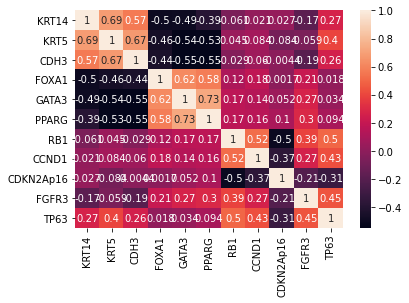

In [11]:
# feature selection based on ROC analysis:
## KRT14, KRT5, CDH3, FOXA1, GATA3, PPARG for Uro vs. Bas
## RB1 , CCND1, CDKN2Ap16, FGFR3

corrmat = data[["Subtype_IHC", "KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3", "TP63"]].corr()

# visualization 
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrmat, annot=True)
plt.show()

In [15]:
X = data[["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3", "TP63"]].values
y = data.iloc[:,8].values
y


array(['BaSq', 'BaSq', 'BaSq', 'Uro', 'BaSq', 'BaSq', 'Uro', 'BaSq', 'GU',
       'BaSq', 'Uro', 'BaSq', 'Uro', 'GU', 'BaSq', 'Uro', 'BaSq', 'BaSq',
       'BaSq', 'BaSq', 'Uro', 'BaSq', 'BaSq', 'BaSq', 'BaSq', 'BaSq',
       'BaSq', 'BaSq', 'Uro', 'Uro', 'Uro', 'Uro', 'Uro', 'BaSq', 'Uro',
       'Uro', 'BaSq', 'BaSq', 'BaSq', 'BaSq', 'BaSq', 'BaSq', 'BaSq',
       'BaSq', 'BaSq', 'BaSq', 'BaSq', 'Uro', 'BaSq', 'GU', 'GU', 'BaSq',
       'Uro', 'BaSq', 'BaSq', 'BaSq', 'BaSq', 'GU', 'GU', 'GU', 'GU',
       'GU', 'Uro', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU',
       'GU', 'GU', 'GU', 'Uro', 'Uro', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU',
       'GU', 'GU', 'GU', 'Uro', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU',
       'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'Uro', 'GU', 'GU', 'GU',
       'Uro', 'GU', 'Uro', 'Uro', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU',
       'GU', 'GU', 'Uro', 'GU', 'GU', 'Uro', 'GU', 'Uro', 'BaSq', 'Uro',
       'GU', 'Uro', 'BaSq', 'Uro', 'BaSq', 'BaSq', 'Ur

In [16]:
# encode IHC subtype as a dummy variable
y,class_names = pd.factorize(y)
y

array([0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [18]:
# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [19]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.93
Confusion Matrix: 
 [[ 37   6   0]
 [  0 146   0]
 [  0  14  67]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.88      1.00      0.94       146
           2       1.00      0.83      0.91        81

    accuracy                           0.93       270
   macro avg       0.96      0.90      0.92       270
weighted avg       0.93      0.93      0.93       270



In [20]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix: 
 [[10  3  1]
 [ 0 49  0]
 [ 1  8 19]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.82      1.00      0.90        49
           2       0.95      0.68      0.79        28

    accuracy                           0.86        91
   macro avg       0.89      0.80      0.83        91
weighted avg       0.87      0.86      0.85        91



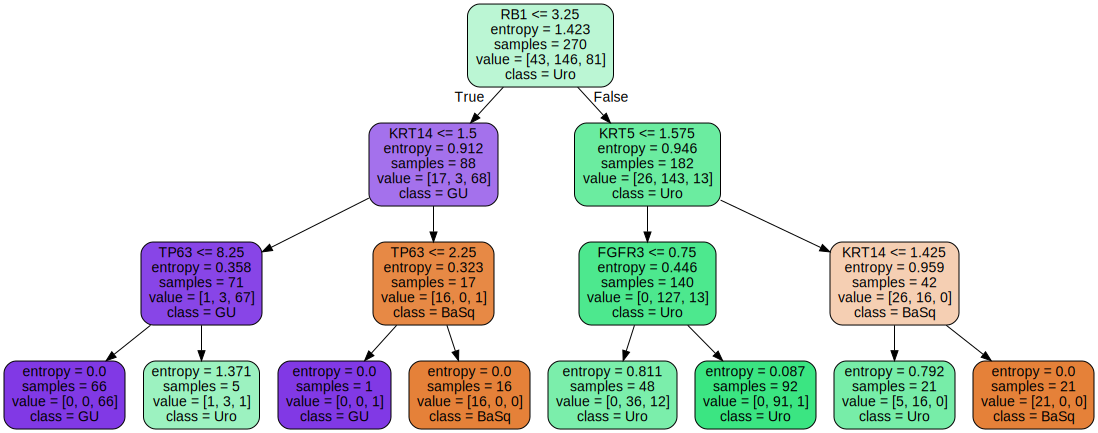

In [21]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
from IPython.display import Image
from IPython.display import Image  

feature_names = ["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3", "TP63"]
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True,feature_names = feature_names, rounded = True, class_names=class_names)
graph = graphviz.Source(dot_data)
graph
#graph.render('round-table.pdf', view=True)  

Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node.
Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.  Entropy in statistics is analogous to entropy in thermodynamics where it signifies disorder. If there are multiple classes in a node, there is disorder in that node. 


In [22]:
#Tuning the Depth of a Tree
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)

In [23]:
accuracy

[0.7912087912087912,
 0.8681318681318682,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461]

In [24]:
# feature importance
importances = pd.DataFrame({'feature':feature_names,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,RB1,0.416
0,KRT14,0.335
9,FGFR3,0.077
10,TP63,0.039
1,KRT5,0.035
5,PPARG,0.035
8,CDKN2Ap16,0.028
4,GATA3,0.023
2,CDH3,0.012
3,FOXA1,0.000


## Luminal (uro+GU) vs. Basal

In [25]:
data.Subtype_IHC.value_counts()

Uro     195
GU      109
BaSq     57
Name: Subtype_IHC, dtype: int64

In [159]:
# making column with luminal and basal value
#data['LumBas'] = pd.DataFrame(np.where(data['Subtype_IHC']== 'BaSq', 'basal', 'luminal'))

def condition(value):
    if  value == 'BaSq':
        return "basal"
    return 'luminal'

data['LumBas'] = data['Subtype_IHC'].apply(condition)

data.columns.values
#data.LumBas.value_counts()

array(['TMA#', 'Age', 'Sex', 'Grade', 'Stage', 'Clinical stage', 'Hyb#',
       'Subtype_LundTax_RNA', 'Subtype_IHC', 'CCNB1', 'CCND1',
       'CD3density', 'CD68density', 'CDH1', 'CDH3', 'CDKN2Ap16', 'CHGA',
       'E2F3', 'EGFR', 'EPCAM', 'ERBB2', 'ERBB3', 'FGFR3', 'FOXA1',
       'FOXM1', 'GATA3', 'KRT14', 'KRT20', 'KRT5', 'NCAM1', 'PPARG',
       'pSTAT3', 'RB1', 'RXRA', 'SYP', 'TP63', 'TUBB2B', 'UPK3', 'VIM',
       'ZEB2', 'LumBas'], dtype=object)

In [160]:
data

,TMA#,Age,Sex,Grade,Stage,Clinical stage,Hyb#,Subtype_LundTax_RNA,Subtype_IHC,CCNB1,...,pSTAT3,RB1,RXRA,SYP,TP63,TUBB2B,UPK3,VIM,ZEB2,LumBas
0,3,74.0,Female,G3,pT2,T4a,91.0,Ba/Sq,BaSq,5.0,...,1.80,9.0,0.8,0.0,9.0,2.0,0.0,1.35,0.0,basal
1,7,75.6,Male,G2,pT2,T3,54.0,Ba/Sq,BaSq,5.0,...,1.35,0.0,0.5,0.0,9.0,1.0,0.0,0.00,1.0,basal
2,29,72.1,Female,G3,pT2,T2,208.0,Ba/Sq,BaSq,3.5,...,1.65,0.0,0.0,0.0,9.0,0.5,0.0,0.05,0.0,basal
3,39,55.3,Female,G3,pT2,T2,25.0,Ba/Sq-Inf,Uro,1.5,...,0.55,9.0,0.7,0.0,8.0,0.0,0.0,0.30,0.0,luminal
4,55,75.5,Female,G3,pT2,T2,24.0,Ba/Sq-Inf,BaSq,4.0,...,1.80,9.0,0.0,0.0,9.0,0.5,0.0,0.70,0.0,basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,351,60.5,Male,G3,pT2,T3,195.0,UroC,Uro,3.0,...,0.00,9.0,0.9,0.0,9.0,0.0,0.5,0.10,0.0,luminal
421,367,66.9,Male,G3,pT2,T2,96.0,UroC,Uro,7.0,...,0.55,9.0,1.1,0.0,8.0,0.0,0.0,0.05,0.0,luminal
422,388,79.4,Female,G3,pT2,T2,325.0,UroC,GU,5.5,...,0.20,9.0,0.0,0.0,8.5,0.0,0.0,0.10,0.0,luminal
423,413,84.4,Male,G3,pT2,T2,190.0,UroC,Uro,3.0,...,0.00,9.0,0.5,0.0,9.0,0.0,2.5,0.00,0.0,luminal


In [161]:
X = data[["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3","TP63"]].values
y = data.iloc[:,40].values
# encode IHC subtype as a dummy variable
y,class_names = pd.factorize(y)
y

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [162]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix: 
 [[ 41   2]
 [  0 227]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.99      1.00      1.00       227

    accuracy                           0.99       270
   macro avg       1.00      0.98      0.99       270
weighted avg       0.99      0.99      0.99       270

Accuracy: 0.93
Confusion Matrix: 
 [[12  2]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.97      0.95      0.96        77

    accuracy                           0.93        91
   macro avg       0.86      0.90      0.88        91
weighted avg       0.94      0.93      0.94        91



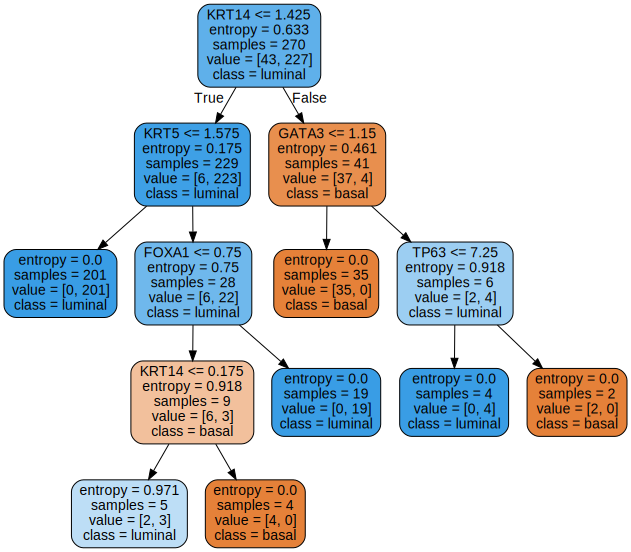

In [163]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
feature_names = ["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3","TP63"]
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True,feature_names = feature_names, rounded = True, class_names=class_names)
graph = graphviz.Source(dot_data)
graph

## Uro vs. GU

Accuracy: 0.96
Confusion Matrix: 
 [[141   5]
 [  3  79]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       146
           1       0.94      0.96      0.95        82

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.97      0.96      0.97       228

Accuracy: 0.93
Confusion Matrix: 
 [[47  2]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.92      0.89      0.91        27

    accuracy                           0.93        76
   macro avg       0.93      0.92      0.93        76
weighted avg       0.93      0.93      0.93        76



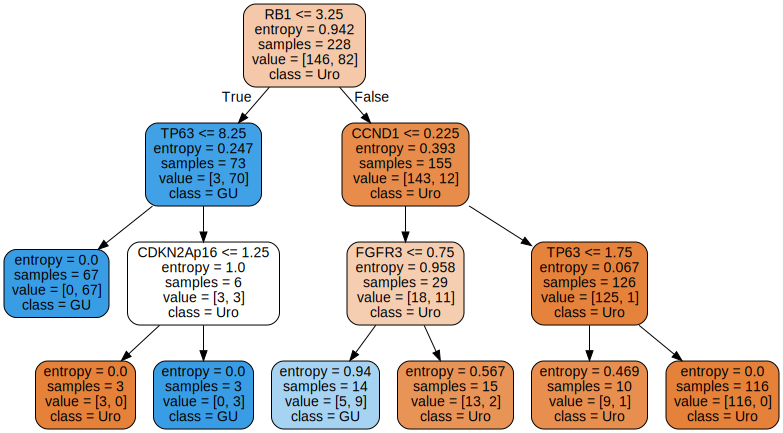

In [164]:
# drop values from subtype_IHC column
data = data.drop(data[(data['Subtype_IHC'] == 'Mes-L') | (data['Subtype_IHC'] == 'BaSq') | (data['Subtype_IHC'] == 'Sc/NE')].index)

data.columns.values

X = data[["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3","TP63"]].values
y = data.iloc[:,8].values
# encode IHC subtype as a dummy variable
y,class_names = pd.factorize(y)
y

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))


# Visualize the tree by graphiz
import graphviz
from sklearn import tree
feature_names = ["KRT14", "KRT5", "CDH3", "FOXA1", "GATA3", "PPARG", "RB1" , "CCND1", "CDKN2Ap16", "FGFR3","TP63"]
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True,feature_names = feature_names, rounded = True, class_names=class_names)
graph = graphviz.Source(dot_data)
graph


______________________________________________________________________________________________________________________________________________